## Customer Segmentation Classification

https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation?select=Train.csv

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

Contents :
1. ID :	Unique ID
2. Gender :	Gender of the customer
3. Ever_Married :	Marital status of the customer
4. Age :	Age of the customer
5. Graduated :	Is the customer a graduate?
6. Profession :	Profession of the customer
7. Work_Experience :	Work Experience in years
8. Spending_Score :	Spending score of the customer
9. Family_Size :	Number of family members for the customer (including the customer)
10. Var_1 :	Anonymised Category for the customer
11. Segmentation :	(target) Customer Segment of the customer

Acknowledgements :
This dataset was acquired from the Analytics Vidhya hackathon.

KNN Algorithm used

## Data collection

In [48]:
import pandas as pd

df1=pd.read_csv("customer_segmentation.csv")
df2=pd.read_csv("customer_seg2.csv")

# Concatenate the DataFrames (train + test)
df= pd.concat([df1,df2],ignore_index=True)
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [49]:
df.shape

(10695, 11)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


## Data Cleaning

Handling Duplicated values

In [51]:
df.duplicated().sum()

38

In [52]:
df.drop_duplicates(inplace=True)

Remove unwanted column

In [53]:
df.drop(columns=["ID","Work_Experience"],axis=1,inplace=True)

# work_experience doesn't provide any usefull insights for customer segmentation

In [54]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,10657,2,Male,5821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ever_Married,10468,2,Yes,6145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10657.0,NaN,NaN,NaN,43.537956,16.7696,18.0,30.0,41.0,53.0,89.0
Graduated,10557,2,Yes,6550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,10495,9,Artist,3309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spending_Score,10657,3,Low,6465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_Size,10210.0,NaN,NaN,NaN,2.843781,1.536758,1.0,2.0,2.0,4.0,9.0
Var_1,10549,7,Cat_6,6889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segmentation,10657,4,D,3008,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Handling Missing Values

In [55]:
df.isnull().sum()

Gender              0
Ever_Married      189
Age                 0
Graduated         100
Profession        162
Spending_Score      0
Family_Size       447
Var_1             108
Segmentation        0
dtype: int64

In [56]:
df["Ever_Married"].value_counts()

Ever_Married
Yes    6145
No     4323
Name: count, dtype: int64

This coloumn is important to identify the customer spending and less missing values.
So I decided to replace it with mode(most repeated YES)

In [57]:
df["Ever_Married"] = df["Ever_Married"].fillna("Yes")

In [58]:
df["Graduated"].value_counts()

Graduated
Yes    6550
No     4007
Name: count, dtype: int64

This coloumn is important to identify the customer spending behaviour based on graduated or students and less missing values.
So I decided to replace it with mode(most repeated YES)

In [59]:
df["Graduated"] = df["Graduated"].fillna("Yes")

In [60]:
df["Profession"].value_counts()

Profession
Artist           3309
Healthcare       1740
Entertainment    1247
Engineer          931
Doctor            926
Lawyer            843
Executive         772
Marketing         401
Homemaker         326
Name: count, dtype: int64

This coloumn is important to assume  how much customer will spend based on their profession and less missing values.
So I decided to replace it with mode(Artist)

In [61]:
df["Profession"] = df["Profession"].fillna("Artist")

In [62]:
df["Family_Size"].value_counts()

Family_Size
2.0    3152
1.0    1956
3.0    1945
4.0    1813
5.0     808
6.0     289
7.0     122
8.0      65
9.0      60
Name: count, dtype: int64

This coloumn is important to identify the customer spending behaviour based on family size and less missing values.
So I decided to replace it with median(average family size ; as a discrete value)

In [63]:
df["Family_Size"].median()

2.0

In [64]:
df["Family_Size"] = df["Family_Size"].fillna(2)

In [65]:
df["Var_1"].value_counts()

Var_1
Cat_6    6889
Cat_4    1468
Cat_3    1082
Cat_2     562
Cat_7     267
Cat_1     167
Cat_5     114
Name: count, dtype: int64

This coloumn is important to identify the customer spending behaviour  and less missing values.
So I decided to replace it with mode(most repeated cat_6)

In [66]:
df["Var_1"] = df["Var_1"].fillna("Cat_6")

In [67]:
df.isnull().sum()

Gender            0
Ever_Married      0
Age               0
Graduated         0
Profession        0
Spending_Score    0
Family_Size       0
Var_1             0
Segmentation      0
dtype: int64

In [68]:
df.shape

(10657, 9)

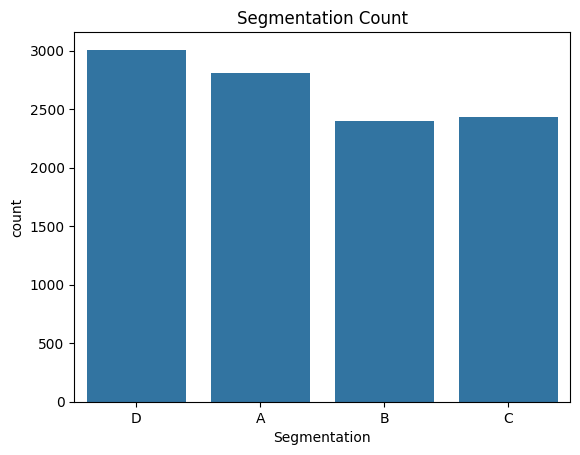

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
# Churn distribution
sns.countplot(x='Segmentation', data=df)
plt.title('Segmentation Count')
plt.show()

## Encoding

Label Encoding

In [70]:
df["Var_1"].dtype

dtype('O')

In [71]:
df["Var_1"].value_counts()

Var_1
Cat_6    6997
Cat_4    1468
Cat_3    1082
Cat_2     562
Cat_7     267
Cat_1     167
Cat_5     114
Name: count, dtype: int64

In [72]:
label = {
    "Var_1":{"Cat_6":6,"Cat_4":4,"Cat_3":3,"Cat_2":2,"Cat_7":7,"Cat_1":1,"Cat_5":5}
}

for col,map in label.items():
    df[col] = df[col].map(map)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10657 entries, 0 to 10694
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          10657 non-null  object 
 1   Ever_Married    10657 non-null  object 
 2   Age             10657 non-null  int64  
 3   Graduated       10657 non-null  object 
 4   Profession      10657 non-null  object 
 5   Spending_Score  10657 non-null  object 
 6   Family_Size     10657 non-null  float64
 7   Var_1           10657 non-null  int64  
 8   Segmentation    10657 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 832.6+ KB


In [74]:
df["Gender"].value_counts()

Gender
Male      5821
Female    4836
Name: count, dtype: int64

In [75]:
df["Ever_Married"].value_counts()

Ever_Married
Yes    6334
No     4323
Name: count, dtype: int64

In [76]:
df["Graduated"].value_counts()

Graduated
Yes    6650
No     4007
Name: count, dtype: int64

In [77]:
df["Profession"].value_counts()

Profession
Artist           3471
Healthcare       1740
Entertainment    1247
Engineer          931
Doctor            926
Lawyer            843
Executive         772
Marketing         401
Homemaker         326
Name: count, dtype: int64

In [78]:
df["Segmentation"].value_counts()

Segmentation
D    3008
A    2813
C    2434
B    2402
Name: count, dtype: int64

In [79]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Gender"] = label.fit_transform(df["Gender"])
df["Ever_Married"] = label.fit_transform(df["Ever_Married"])
df["Graduated"] = label.fit_transform(df["Graduated"])
df["Profession"] = label.fit_transform(df["Profession"])
df["Segmentation"] = label.fit_transform(df["Segmentation"])

In [80]:
df["Spending_Score"].value_counts()

Spending_Score
Low        6465
Average    2593
High       1599
Name: count, dtype: int64

Ordinal Encoding

In [81]:
order = {
    "Spending_Score" :{"Low":0,"Average":1,"High":2}
}

for col,map in order.items():
    df[col] = df[col].map(map)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10657 entries, 0 to 10694
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          10657 non-null  int32  
 1   Ever_Married    10657 non-null  int32  
 2   Age             10657 non-null  int64  
 3   Graduated       10657 non-null  int32  
 4   Profession      10657 non-null  int32  
 5   Spending_Score  10657 non-null  int64  
 6   Family_Size     10657 non-null  float64
 7   Var_1           10657 non-null  int64  
 8   Segmentation    10657 non-null  int32  
dtypes: float64(1), int32(5), int64(3)
memory usage: 624.4 KB


## Correlation

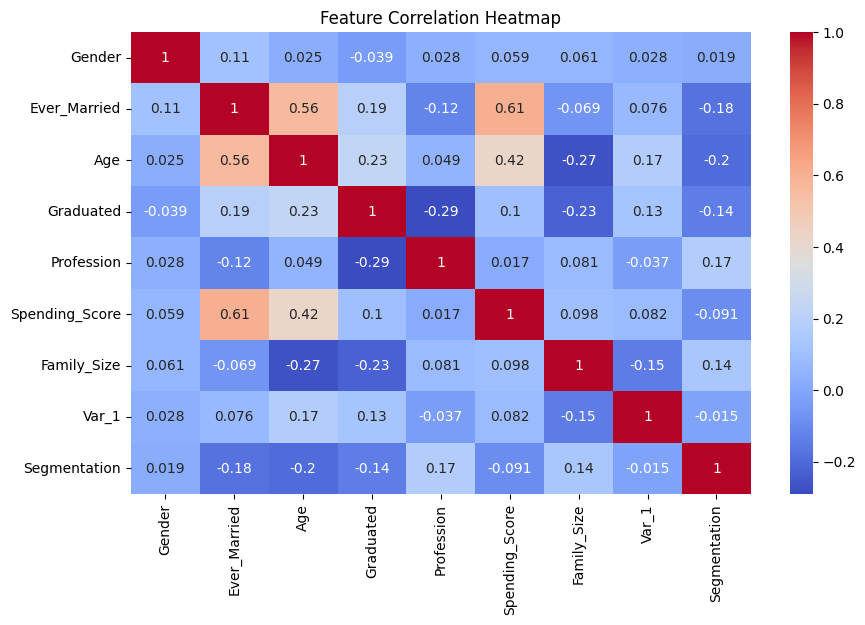

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap — select only numeric columns
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include='number')  # Filter numeric columns only
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

"Ever_Married", "Age", "Spending_Score" has high correlation of above 0.5 , but these three columns are important for identifying customer behaviour and spending strategy. So I decided not to drop anymore columns.

## Outliers

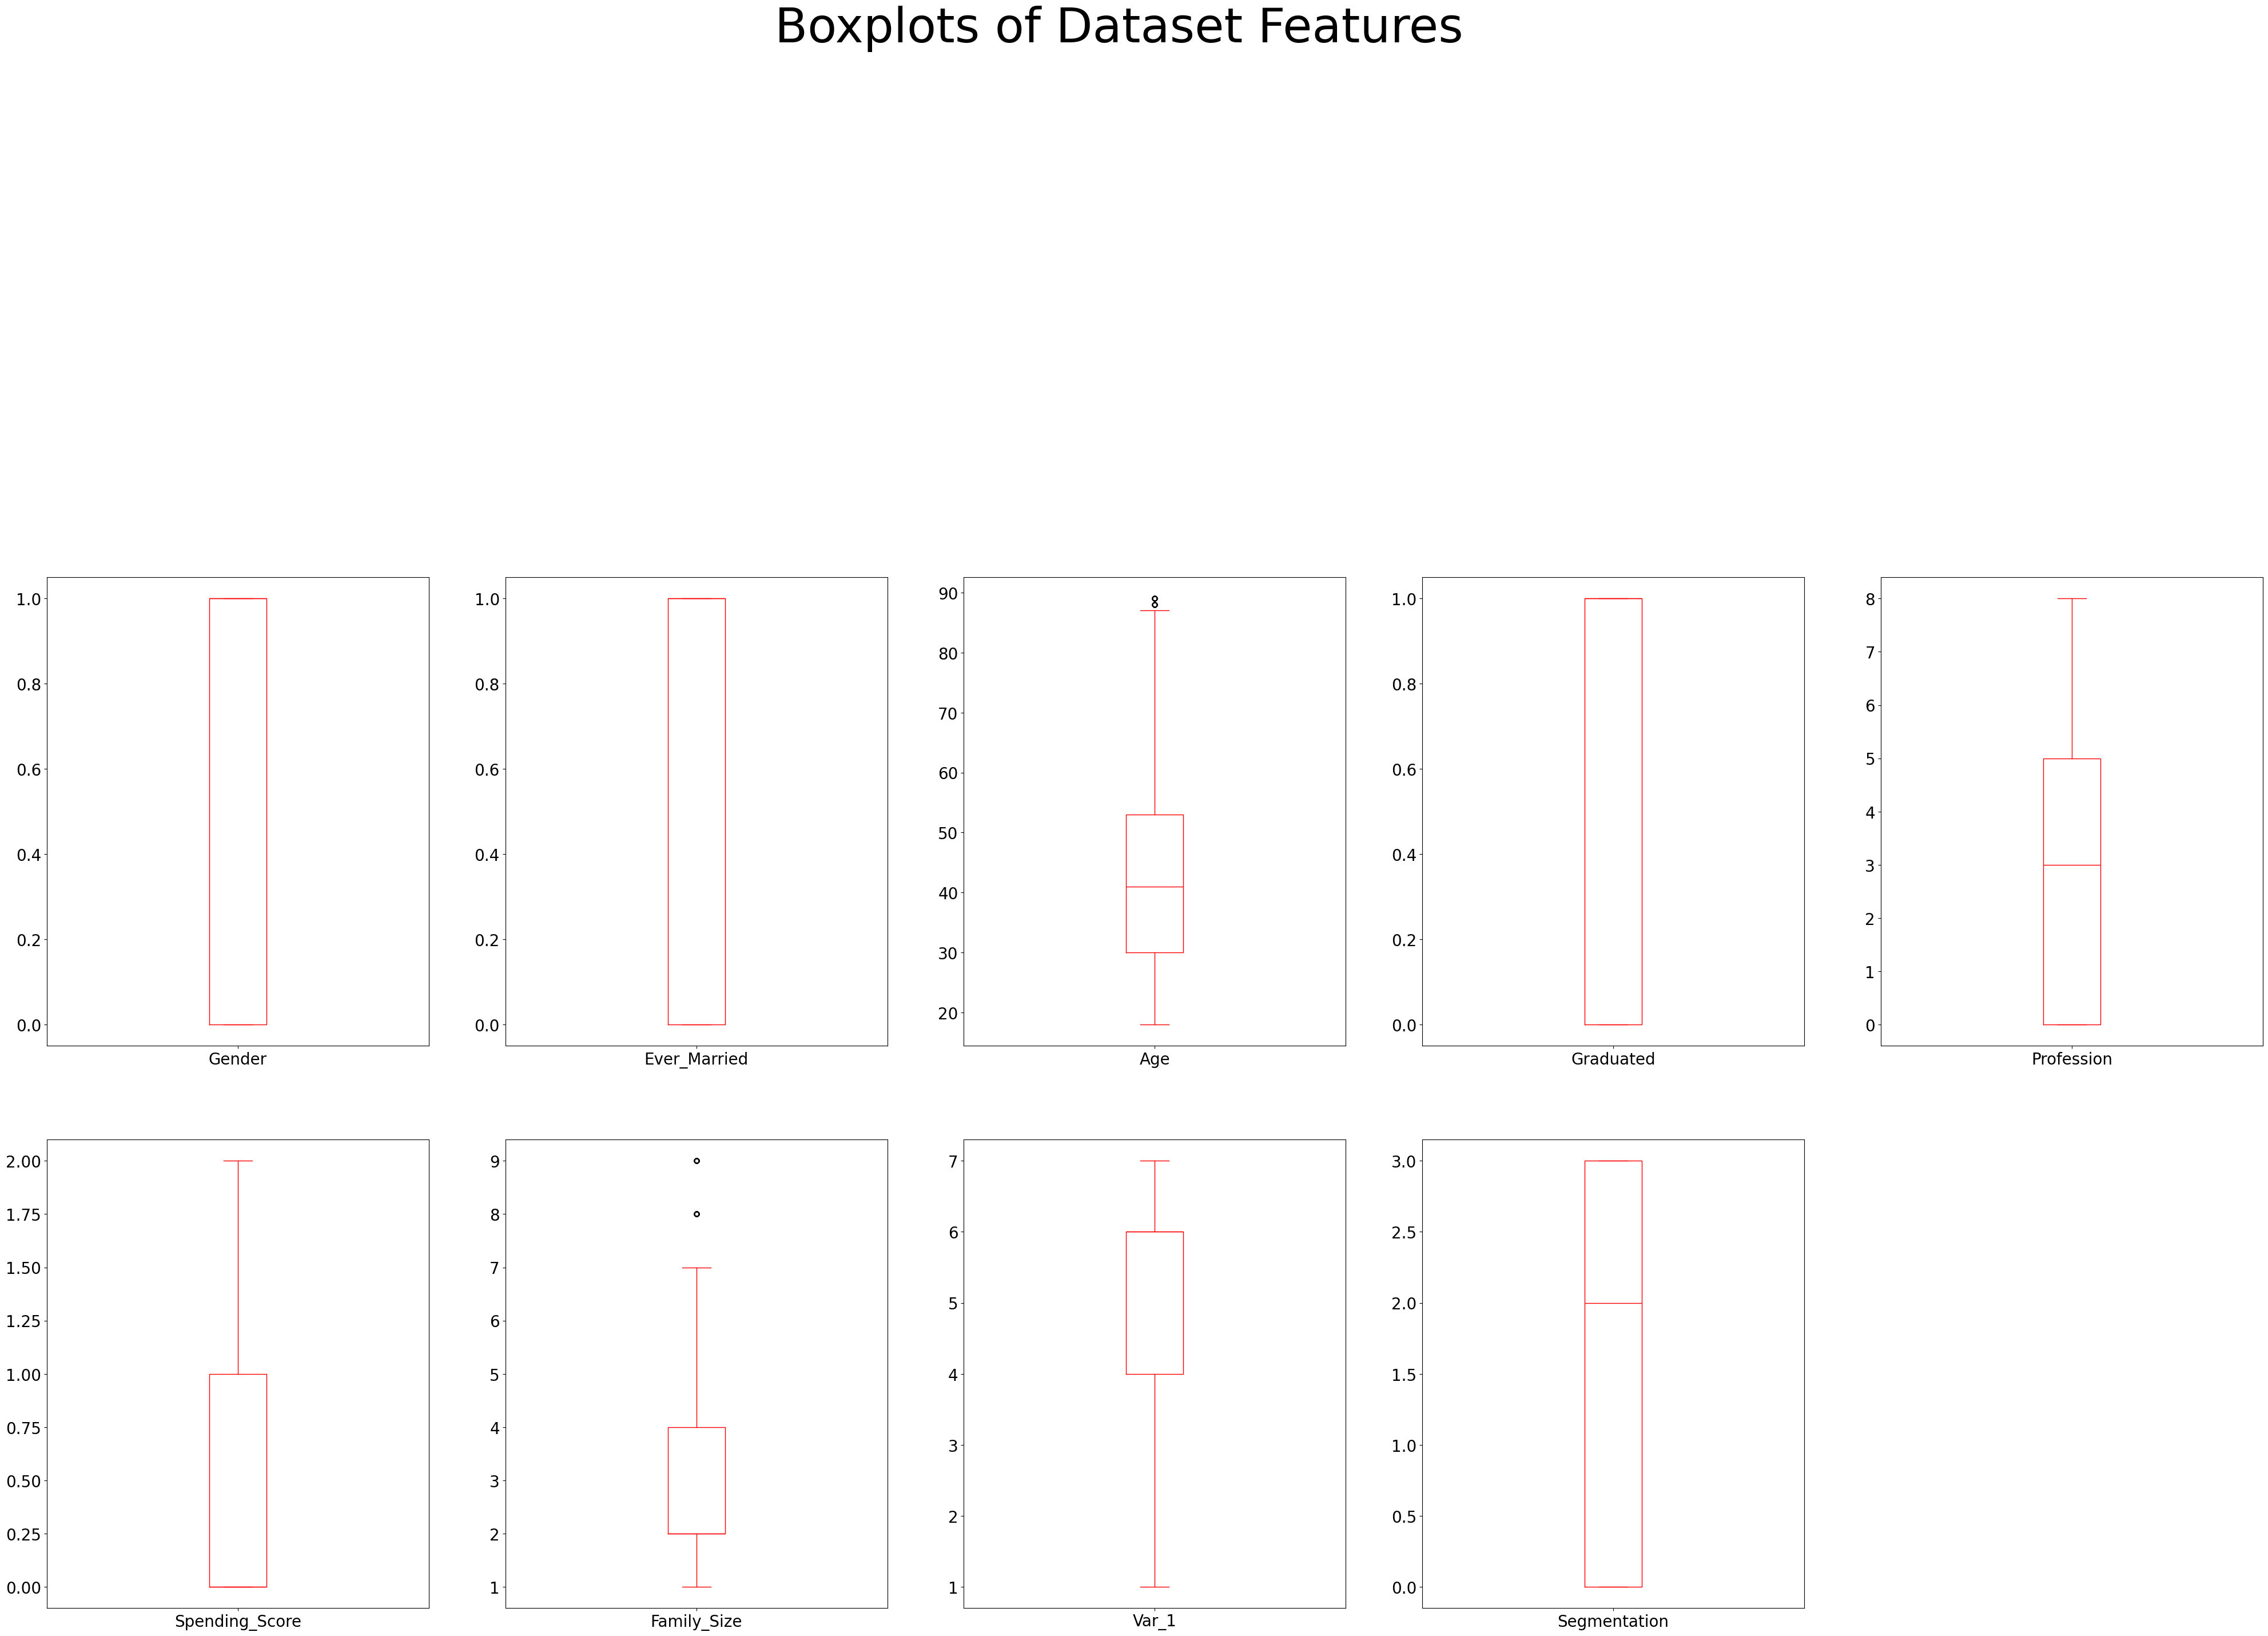

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

df.plot(kind="box",subplots=True,layout=(8,5),figsize=(50,100),color="red",fontsize=20)
plt.suptitle("Boxplots of Dataset Features", fontsize=60)
plt.show()

## Removing Outliers

In [85]:
# Copy
df_copy = df.copy()

def remove_outliers_iqr(df,exclude_columns):
    for column in df.select_dtypes(include=["number"]):
        if column in exclude_columns:
            continue
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3-Q1
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        # Filter out the outliers
        df = df[(df[column] >=lower_bound) & (df[column] <=upper_bound)]
        
    return df

# Define  the columns to exclude
exclude_columns = ["Exited","Geography","NumOfProducts"]

# Remove Outliers
df = remove_outliers_iqr(df,exclude_columns)

# Print shapes of data before and after removing outliers
print("Shape of data before removing outilers :", df_copy.shape)
print("Shape of data after removing outliers :",df.shape)
print("Number of outliers removed :", df_copy.shape[0]-df.shape[0])

Shape of data before removing outilers : (10657, 9)
Shape of data after removing outliers : (10442, 9)
Number of outliers removed : 215


## Model-  KNN Algorithm 

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [87]:
x = df.drop("Segmentation",axis=1)
y = df["Segmentation"]

For KNN , must have to scale the data as it depends on the distance between two points.

As there is no data leakage (no training step), so whole  x  is scaled together

In [88]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [90]:
knn = KNeighborsClassifier(n_neighbors=43,metric='minkowski',p=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=43)

In [91]:
y_pred = knn.predict(x_test)

Evaluvation of Model

In [92]:
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Precision score :",precision_score(y_test,y_pred,average="weighted"))
print("Recall Score :",recall_score(y_test,y_pred,average="weighted"))
print("Confusion Matrix :", confusion_matrix(y_test,y_pred))
print("F1-SCORE :",f1_score(y_test,y_pred,average="weighted"))
print("classification_report :")
print(classification_report(y_test,y_pred))

Accuracy : 0.47678314983245573
Precision score : 0.4718868661296373
Recall Score : 0.47678314983245573
Confusion Matrix : [[238  92  74 139]
 [158 133 130  60]
 [ 86  69 246  64]
 [139  47  35 379]]
F1-SCORE : 0.4713778085347436
classification_report :
              precision    recall  f1-score   support

           0       0.38      0.44      0.41       543
           1       0.39      0.28      0.32       481
           2       0.51      0.53      0.52       465
           3       0.59      0.63      0.61       600

    accuracy                           0.48      2089
   macro avg       0.47      0.47      0.47      2089
weighted avg       0.47      0.48      0.47      2089



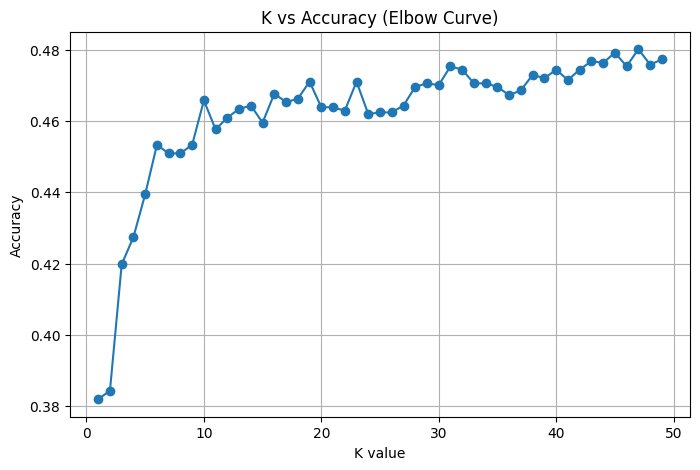

In [93]:
k_values = range(1, 50)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)  
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title("K vs Accuracy (Elbow Curve)")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid(True)

Cross Validation

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

for k in range(30,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=4)
    print(f"K={k}, Accuracy={scores.mean():.4f}")

K=30, Accuracy=0.4550
K=31, Accuracy=0.4576
K=32, Accuracy=0.4567
K=33, Accuracy=0.4595
K=34, Accuracy=0.4586
K=35, Accuracy=0.4584
K=36, Accuracy=0.4579
K=37, Accuracy=0.4553
K=38, Accuracy=0.4549
K=39, Accuracy=0.4559
K=40, Accuracy=0.4576
K=41, Accuracy=0.4565
K=42, Accuracy=0.4592
K=43, Accuracy=0.4586
K=44, Accuracy=0.4579
K=45, Accuracy=0.4562
K=46, Accuracy=0.4558
K=47, Accuracy=0.4560
K=48, Accuracy=0.4580
K=49, Accuracy=0.4576


## Demonstration (Final Report)

The model performs best on class 3 (63% recall) and worst on class 1 (28% recall).

Accuracy (47.6%) indicates that the model correctly predicted around half of the test samples.

Precision (47%) shows that many of the model’s positive predictions are incorrect — possibly due to class overlap or noisy data.

Recall (47%) reveals that the model is missing a fair amount of true positives, especially for Class 1.

F1-score (47%) combines precision and recall — moderate, indicating the need for further tuning.

KNN performed moderately, achieving its best performance on Class 3 (F1 = 0.61).

Class imbalance or similar feature patterns across classes may have led to confusion among categories.

Since KNN relies heavily on distance-based similarity, the result also depends on feature scaling and the choice of K.

Further tuning, scaling, and data balancing are recommended to improve model accuracy and generalization.